In [1]:
import pandas as pd

In [2]:
# Load the dataset
netflix_data = pd.read_csv('C:/Users/Pavly/Downloads/netflix_data.csv')



In [3]:
# Display the first few rows of the dataset
print(netflix_data.head())

   Unnamed: 0 show_id     type  title           director  \
0           1      s2    Movie   7:19  Jorge Michel Grau   
1           2      s3    Movie  23:59       Gilbert Chan   
2           3      s4    Movie      9        Shane Acker   
3           4      s5    Movie     21     Robert Luketic   
4           5      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
4  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year  duration  \
0  December 23, 2016          2016        93   
1  December 20, 2018          2011        78   
2  November 16, 2017          2009        80   
3    January 1, 2020

In [4]:
# Check the structure of the dataset
print(netflix_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4812 non-null   int64 
 1   show_id       4812 non-null   object
 2   type          4812 non-null   object
 3   title         4812 non-null   object
 4   director      4812 non-null   object
 5   cast          4812 non-null   object
 6   country       4812 non-null   object
 7   date_added    4812 non-null   object
 8   release_year  4812 non-null   int64 
 9   duration      4812 non-null   int64 
 10  description   4812 non-null   object
 11  genre         4812 non-null   object
dtypes: int64(3), object(9)
memory usage: 451.3+ KB
None


In [5]:
# Display summary statistics
print(netflix_data.describe())


        Unnamed: 0  release_year     duration
count  4812.000000   4812.000000  4812.000000
mean   3842.654198   2012.711554    99.566708
std    2253.408284      9.517978    30.889305
min       1.000000   1942.000000     1.000000
25%    1893.750000   2011.000000    88.000000
50%    3844.000000   2016.000000    99.000000
75%    5776.500000   2018.000000   116.000000
max    7783.000000   2021.000000   253.000000


In [6]:
# Check for missing values
print(netflix_data.isnull().sum())

Unnamed: 0      0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


In [7]:
# Fill or drop missing values if necessary
netflix_data = netflix_data.dropna(subset=['duration'])

In [8]:
netflix_data['duration']

0        93
1        78
2        80
3       123
4         1
       ... 
4807     88
4808     94
4809     88
4810     99
4811    111
Name: duration, Length: 4812, dtype: int64

In [9]:
# Summary statistics of movie durations
print(netflix_data['duration'].describe())

count    4812.000000
mean       99.566708
std        30.889305
min         1.000000
25%        88.000000
50%        99.000000
75%       116.000000
max       253.000000
Name: duration, dtype: float64


In [10]:
import matplotlib.pyplot as plt

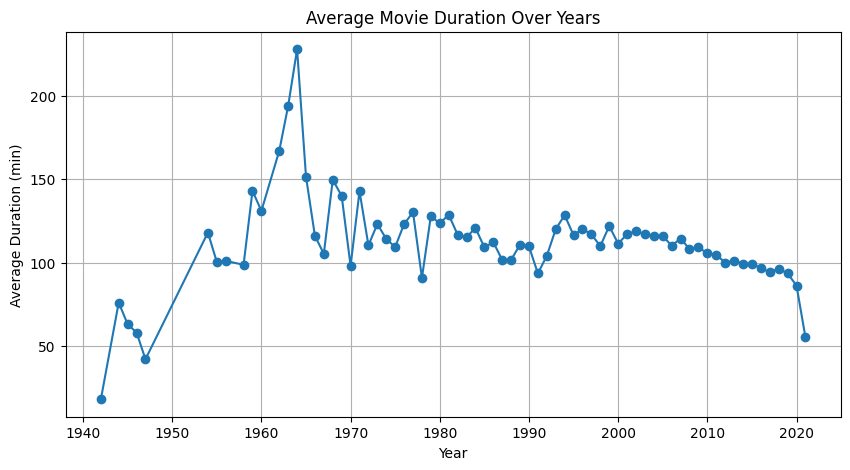

In [11]:
# Group by year and calculate the average duration
avg_duration_by_year = netflix_data.groupby('release_year')['duration'].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_duration_by_year, marker ="o")
plt.title('Average Movie Duration Over Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (min)')
plt.grid(True)

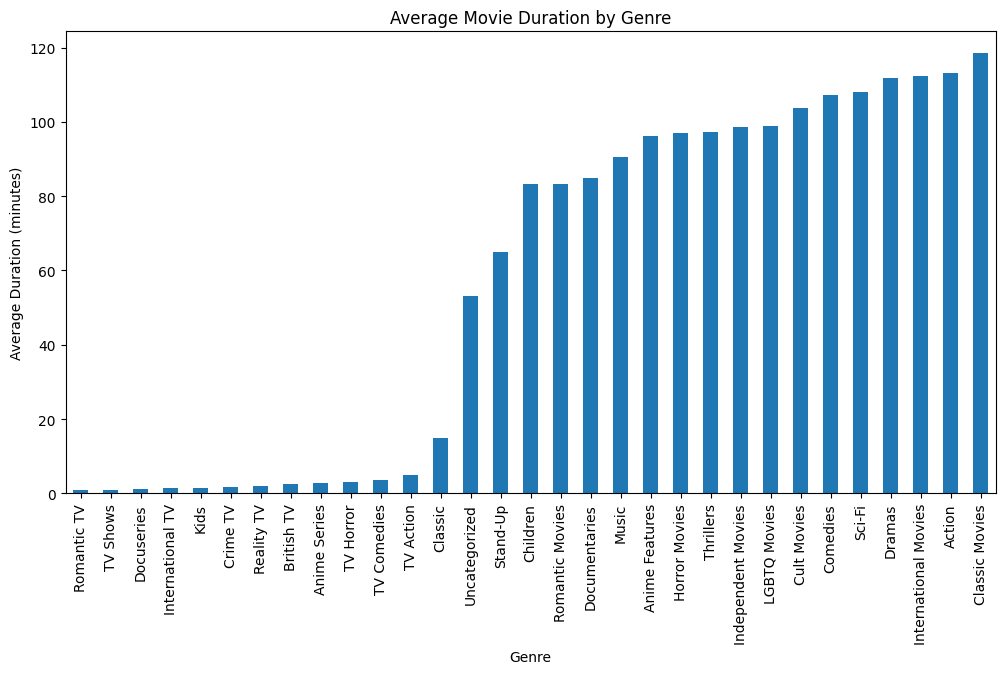

In [12]:
# Analyze the duration by genre
genre_duration = netflix_data.groupby('genre')['duration'].mean().sort_values()

# Plot the average duration by genre
plt.figure(figsize=(12, 6))
genre_duration.plot(kind= 'bar')
plt.title('Average Movie Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.show()

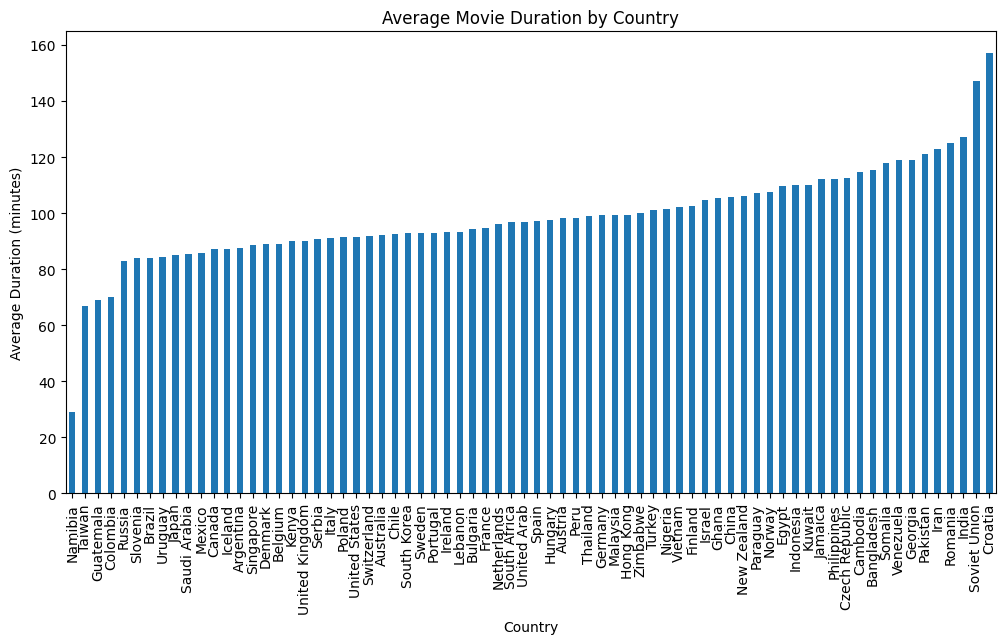

In [13]:
# Explore other factors like country or director
country_duration = netflix_data.groupby('country')['duration'].mean().sort_values()

# Plot the average duration by country
plt.figure(figsize=(12, 6))
country_duration.plot(kind='bar')
plt.title('Average Movie Duration by Country')
plt.xlabel('Country')
plt.ylabel('Average Duration (minutes)')
plt.show()

In [16]:
# Distribution of content types
content_type_distribution = netflix_data['type'].value_counts()
print(content_type_distribution)




type
Movie      4677
TV Show     135
Name: count, dtype: int64


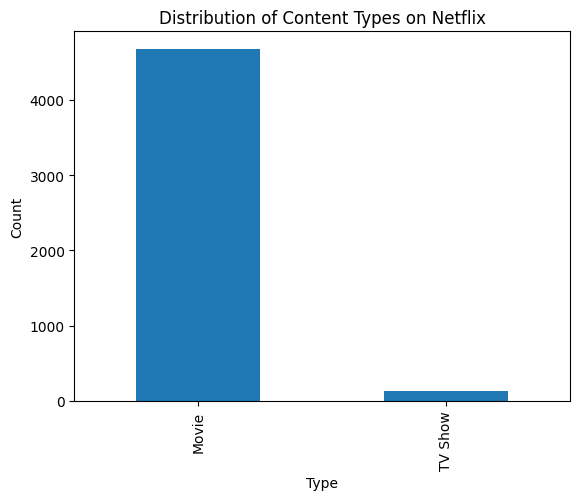

In [17]:
# Plot the distribution of content types
content_type_distribution.plot(kind='bar', title='Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



In [24]:
# Most common genres
netflix_data['genre'] = netflix_data['genre'].str.split(', ')
all_genres = netflix_data['genre'].explode().value_counts()
print(all_genres.head(10))




genre
Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 283
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
Name: count, dtype: int64


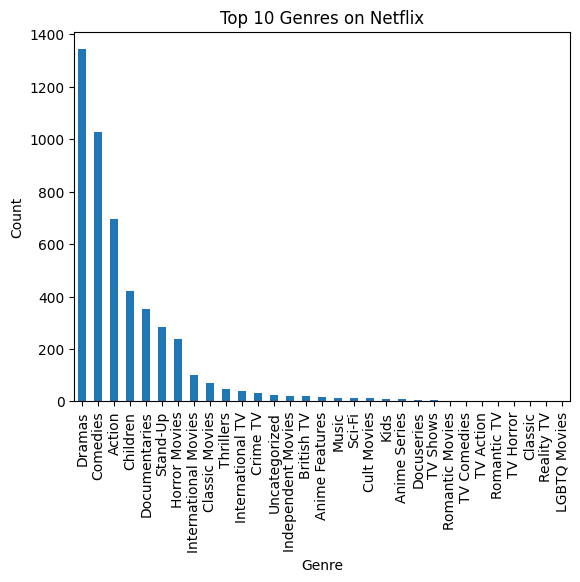

In [25]:
# Plot the most common genres
all_genres.plot(kind='bar', title='Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [26]:
# Trend of content release over the years
release_year_trend = netflix_data['release_year'].value_counts().sort_index()
print(release_year_trend)



release_year
1942      1
1944      1
1945      1
1946      1
1947      1
       ... 
2017    646
2018    624
2019    488
2020    379
2021      4
Name: count, Length: 71, dtype: int64


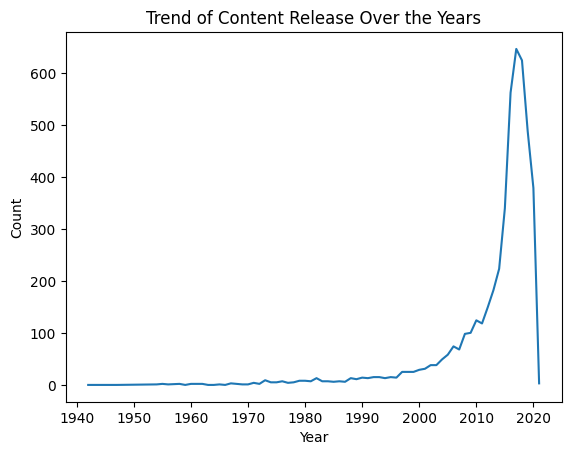

In [27]:
# Plot the release year trend
release_year_trend.plot(kind='line', title='Trend of Content Release Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [30]:
# Analyzing duration of movies and TV shows
# Assuming 'duration' column has minutes for movies and seasons for TV shows
df_movies = netflix_data[netflix_data['type'] == 'Movie']
df_shows = netflix_data[netflix_data['type'] == 'TV Show']



In [35]:
# Clean and convert duration for TV shows
df_shows['duration'] = df_shows['duration'].replace(' Seasons', '').replace(' Season', '').astype(int)
print(df_shows['duration'].describe())

count    135.000000
mean       1.940741
std        2.118726
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       15.000000
Name: duration, dtype: float64


C:\Users\Pavly\AppData\Local\Temp\ipykernel_2232\703625214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['duration'] = df_shows['duration'].replace(' Seasons', '').replace(' Season', '').astype(int)
